<a href="https://colab.research.google.com/github/barrosyan/computational_physics_studies/blob/main/stellar_evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [13]:
def stellar_evolution_model(time, initial_conditions, parameters):
    # Define the system of differential equations for stellar evolution
    def equations(t, y, p):
        mass, radius, luminosity, temperature = y
        param1, param2, param3, param4, param5, param6 = p

        # Constants
        G = 6.67430e-11  # Gravitational constant
        c = 2.99792458e8  # Speed of light
        epsilon = 1e-10

        # Additional physical processes
        # Convection-related terms
        convective_energy_transport = param4 * np.power((luminosity / np.maximum(temperature**4, epsilon)), 0.25)
        mixing = param5 * radius

        # Nuclear reaction-related terms
        energy_generation = param6 * mass * temperature

        # Compute the derivatives of the variables
        dmass_dt = -param1 * mass**2 + energy_generation
        dradius_dt = param2 * (mass / np.maximum(radius**2, epsilon)) * np.sqrt(luminosity / np.maximum(temperature**4, epsilon))
        dluminosity_dt = param3 * mass * (temperature**4 - (radius * temperature)**4)
        dtemperature_dt = -3 * (luminosity * c**2 / (16 * np.pi * G * mass * np.maximum(radius**2, epsilon))) * np.sqrt(np.maximum(temperature, epsilon)) + convective_energy_transport + mixing

        return [dmass_dt, dradius_dt, dluminosity_dt, dtemperature_dt]

    # Solve the system of differential equations
    solution = solve_ivp(equations, [0, time], initial_conditions, args=(parameters,))
    return solution

In [14]:
# Example usage
initial_conditions = [1.0, 0.0, 1.0, 5000.0]
parameters = [0.5, 2.0, 1e-5, 0.2, 0.1, 1e-6]  # Including parameters for convection and nuclear reactions
time = 10.0
solution = stellar_evolution_model(time, initial_conditions, parameters)

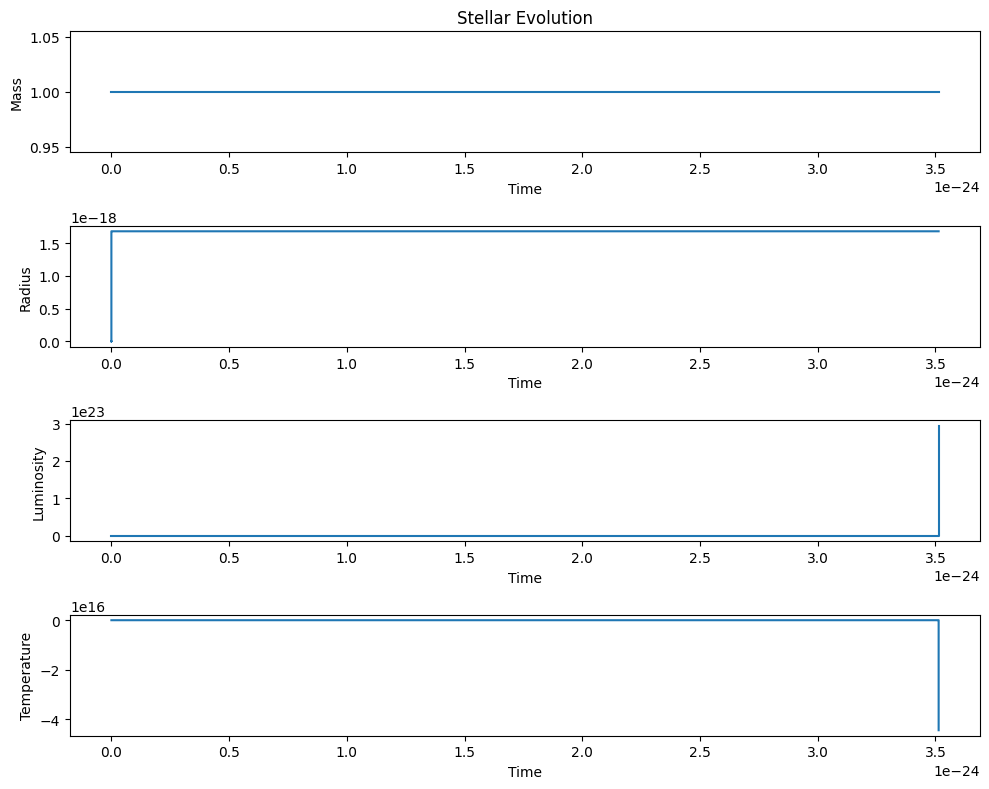

In [15]:
# Plot the evolution of stellar parameters
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(solution.t, solution.y[0])
plt.xlabel('Time')
plt.ylabel('Mass')
plt.title('Stellar Evolution')

plt.subplot(412)
plt.plot(solution.t, solution.y[1])
plt.xlabel('Time')
plt.ylabel('Radius')

plt.subplot(413)
plt.plot(solution.t, solution.y[2])
plt.xlabel('Time')
plt.ylabel('Luminosity')

plt.subplot(414)
plt.plot(solution.t, solution.y[3])
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [17]:
class StellarEvolutionModel(nn.Module):
    def __init__(self):
        super(StellarEvolutionModel, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 4)  # Output layer for the four variables: mass, radius, luminosity, temperature

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
def stellar_evolution_model(time, initial_conditions, parameters):
    model = StellarEvolutionModel()

    # Define the loss function
    criterion = nn.MSELoss()

    # Define the optimizer
    optimizer = optim.Adam(model.parameters())

    # Prepare the training data
    num_samples = 1000
    t = torch.linspace(0, time, num_samples)
    initial_conditions = torch.tensor(initial_conditions).repeat(num_samples, 1)
    inputs = initial_conditions[:, 1:]  # Remove the time feature from the input

    # Train the model
    for epoch in range(100):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

    # Predict the evolution of stellar parameters
    predictions = model(inputs).detach().numpy()

    return t.numpy(), predictions[:, 0], predictions[:, 1], predictions[:, 2], predictions[:, 3]

In [19]:
# Example usage
initial_conditions = [1.0, 0.0, 1.0, 5000.0]
parameters = [0.5, 2.0, 1e-5]
time = 10.0
t, mass, radius, luminosity, temperature = stellar_evolution_model(time, initial_conditions, parameters)

RuntimeError: ignored

In [ ]:


# Plot the evolution of stellar parameters
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(t, mass)
plt.xlabel('Time')
plt.ylabel('Mass')
plt.title('Stellar Evolution')

plt.subplot(412)
plt.plot(t, radius)
plt.xlabel('Time')
plt.ylabel('Radius')

plt.subplot(413)
plt.plot(t, luminosity)
plt.xlabel('Time')
plt.ylabel('Luminosity')

plt.subplot(414)
plt.plot(t, temperature)
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()